# **Notebook Correlation Study**

## Objectives

* Determine the the house attributes that correlates with the target. The target is 'sale price'

## Inputs

* Cleaned dataset from the previous step (data_cleaning), namely the outputs/datasets/house_prices_cleaned.csv 

## Outputs

*  As per defined business requirement number one, client expects data visualisations of variables/attributes correlated with sale price. Hence, output of this notebook are data plots/visualisations to be used in the Streamlit App

## Conclusions from the correlation study

*  


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\My_Folders\\CodeInstitute\\Project_5_files\\Project-5\\Project-5'

In [5]:
import os; print(os.getcwd())

c:\My_Folders\CodeInstitute\Project_5_files\Project-5\Project-5


# Load Data

In [6]:
import pandas as pd

file_path = r"C:\My_Folders\CodeInstitute\Project_5_files\Project-5\Project-5\outputs\datasets\cleaned\HousePricesCleaned.csv"

df = pd.read_csv(file_path)


# Data Exploration

Data Profiling to review the dataset. Particular focus how individual variables do have correlation with target ('sale price').

Data Exploration is achieved with Pandas Profiling.
Pandas Profiling shows that 10 variables have missing values. I have no idea why values are missing here since house_prices_cleaned.csv where
all missing data was imputed was used as the source for the Pandas Profiling. I will proceed from here to see if I can still remove the
variables with missing values in a subsequent step. 

---

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

C:\Users\wstab\AppData\Local\Temp\ipykernel_35768\962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation and PPS Analyses

Pandas Profiling shows one variable to be of nature "text" rather than of nature "numeric". From the DataCleaning&FeatureEngineering excel spreadsheet, it is known I deal with categorical of ordinal nature.

Categorical variable must be encoded with OneHotEncoder to be used in correlation and PPS analysis.


Section 2 content

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)


(1460, 22)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.000000,706,150,548,2003.0,1710,8450,65.0,...,5,7,856,2003,2003,208500,1,0,0,0
1,1262,0.0,3.000000,978,284,460,1976.0,1262,9600,80.0,...,8,6,1262,1976,1976,181500,0,1,0,0
2,920,866.0,3.000000,486,434,608,2001.0,1786,11250,68.0,...,5,7,920,2001,2002,223500,1,0,0,0
3,961,0.0,2.883272,216,540,642,1998.0,1717,9550,60.0,...,5,7,756,1915,1970,140000,1,0,0,0
4,1145,0.0,4.000000,655,490,836,2000.0,2198,14260,84.0,...,5,8,1145,2000,2000,250000,1,0,0,0


---

- Heatmaps to be created to visualise correlation matrix of dataset
- Calculation of correlation matrices and PPS matrix and display results
- Code taken from CI ProdictePowerScore Unit1: Introduction, Video No. 6

In [9]:
import os

# create the directory where images are stored
os.makedirs('docs/plots', exist_ok=True)


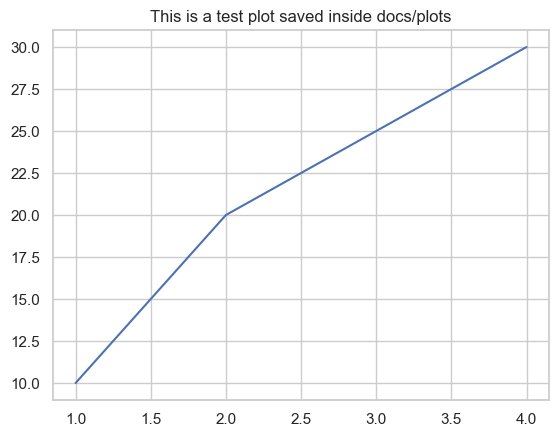

In [14]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("This is a test plot saved inside docs/plots")
plt.savefig('docs/plots/test_plot.png', bbox_inches='tight')
plt.show()

def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    """
    Create heatmap using correlations.
    """
    print("heatmap_corr function is being called")
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5)
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.savefig('docs/plots/heatmap.png', bbox_inches='tight')

        plt.show()



NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (2852421808.py, line 5)